In [4]:
# IMPORT REQUIRED LIBRARIES AND FUNCTIONS


'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns

'''Data Analysis'''
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

'''Manipulating Data and Model Building'''
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GlobalMaxPooling2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Add
from keras.models import Sequential

In [5]:

dataset_train_labels = pd.read_csv('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/labels_training.csv')

In [6]:
dataset_train_images='/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/training/'
dataset_test_images='/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/testing/'

In [7]:
dataset_train_labels.head()

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


- id are names of the image before tif
- label has two values:
  - 0: No solar panels in the image
  - 1: Solar panels present in the image

In [8]:
# LOADING DATA AND PREPROCESSING
# createing numpy array format
def load_data(dir_data, dir_labels):

    labels_pd = pd.read_csv(dir_labels)                         
    ids = labels_pd.id.values                                   
    data = []   #list                                          
    for identifier in ids:
        fname = dir_data + identifier.astype(str) + '.tif'      # Generating the file name
        image = mpl.image.imread(fname)                        
        data.append(image)                                      
    data = np.array(data)                                       
    labels = labels_pd.label.values                             
    return data, labels                                         # Return the array of data and respective labels

In [9]:
# load train data - time consuming code cell
X, y = load_data(dataset_train_images, '/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/labels_training.csv')

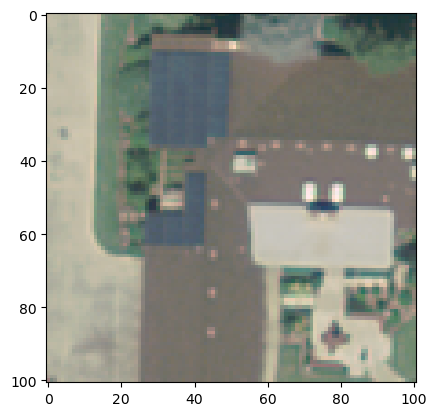

In [10]:
plt.imshow(X[8]) 

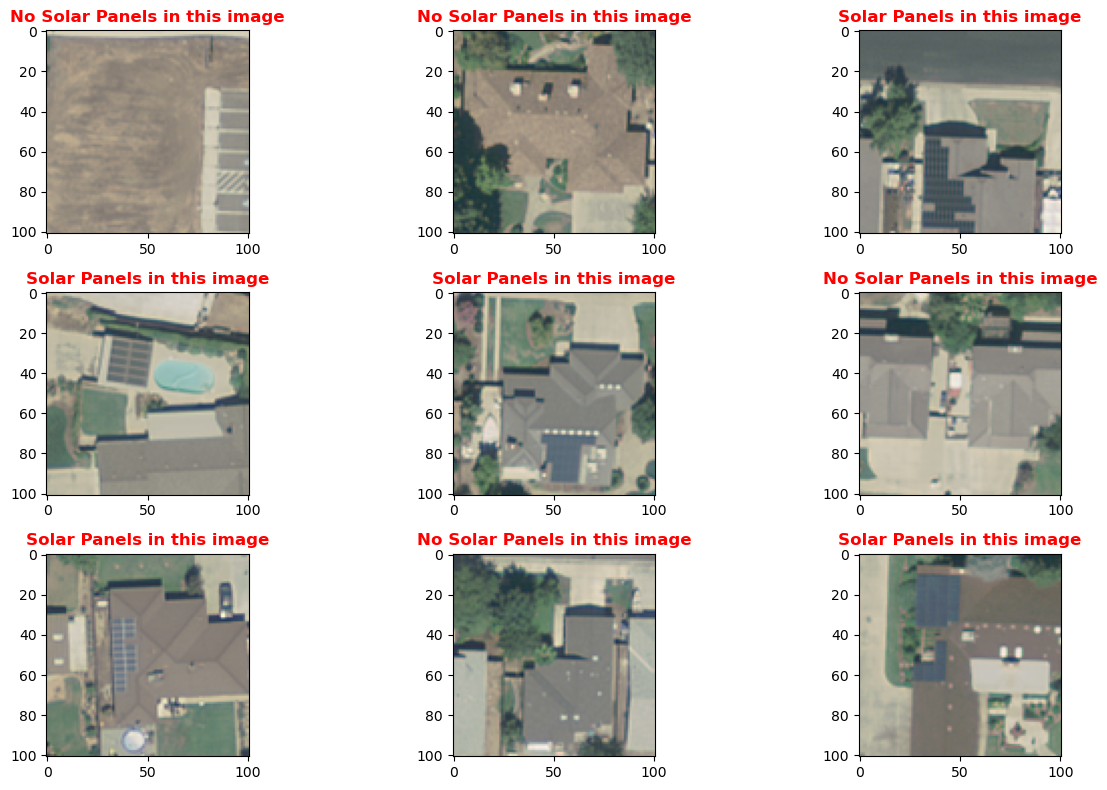

In [11]:
# display the images with and without solar panels
plt.figure(figsize = (13,8))                         
for i in range(9):                                   
  plt.subplot(3, 3, i+1)                             
  plt.imshow(X[i])                                  
  if y[i] == 0:                                      
    title = 'No Solar Panels in this image'         
  else:                                              
    title = 'Solar Panels in this image'             
  plt.title(title, color = 'r', weight = 'bold')     
plt.tight_layout()                                   
plt.show()                                          

In [12]:
# print data shape
print('X shape:\n', X.shape)

X shape:
 (1500, 101, 101, 3)


In [13]:
# check number of samples
print('Distribution of y', np.bincount(y))

Distribution of y [995 505]


#### Normalization:

> Normalize pixel values to a specific range (e.g., between 0 and 1). Normalization helps the model converge faster during training.

In [14]:
# scale pixel values between 0 and 1
X = X / 255.0

## CNN 

In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

y_binary = to_categorical(y, num_classes=2)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


def create_cnn_model(input_shape=(101, 101, 3), num_classes=2):
    model = Sequential()


    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))


    model.add(Flatten())


    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))  

    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


cnn_model = create_cnn_model()


history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
38/38 [==============================] - 9s 218ms/step - loss: 0.6521 - accuracy: 0.6600 - val_loss: 0.6535 - val_accuracy: 0.6500
Epoch 2/10
38/38 [==============================] - 8s 198ms/step - loss: 0.6386 - accuracy: 0.6667 - val_loss: 0.6211 - val_accuracy: 0.6500
Epoch 3/10
38/38 [==============================] - 8s 204ms/step - loss: 0.6146 - accuracy: 0.6750 - val_loss: 0.5889 - val_accuracy: 0.6900
Epoch 4/10
38/38 [==============================] - 8s 201ms/step - loss: 0.5766 - accuracy: 0.7050 - val_loss: 0.5510 - val_accuracy: 0.7167
Epoch 5/10
38/38 [==============================] - 8s 204ms/step - loss: 0.5736 - accuracy: 0.7025 - val_loss: 0.5609 - val_accuracy: 0.7367
Epoch 6/10
38/38 [==============================] - 7s 197ms/step - loss: 0.5441 - accuracy: 0.7242 - val_loss: 0.5266 - val_accuracy: 0.7233
Epoch 7/10
38/38 [==============================] - 8s 205ms/step - loss: 0.5421 - accuracy: 0.7150 - val_loss: 0.5466 - val_accuracy: 0.7367
Epoch 

## MODEL : CONVOLUTIONAL NEURAL NETWORK

In [20]:
# define CNN
def build_model():
    '''
    Returns a Keras CNN model
    '''
    # define image dimensions
    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    # define a straightforward sequential neural network
    model = Sequential()

    # layer-1
    #filter is convolutional matrix which is applied across the image = 32 filters
    #kernal size is 3x3 matrix(filter)
    #relu positive kept as it is, negative is taken out
    model.add(Conv2D(filters=32,
                     kernel_size=3,
                     activation='relu',
                     input_shape=(IMAGE_HEIGHT,
                                  IMAGE_WIDTH,
                                  IMAGE_CHANNELS)))

    #adding normalizing layer to improve the speed of training
    model.add(BatchNormalization())

    # As we move forword in the layers pattern gets more complex,
    # to capture the maximum combinations in subsequent layers
    # layer-2
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-3
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # Pooling layer is to reduce dimentions of feature map by summerizing presence of features
    # max-pool - sends only imp data to next layer - here 2x2 matrix
    model.add(MaxPooling2D(pool_size=2))

    # layer-4
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-5
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # max-pool
    model.add(MaxPooling2D(pool_size=2))

    # layer-6
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-7
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # gobal-max-pool- performs downsampling by computing the maximum of the height and width dimensions of the input
    # using it as a substitute of Flatten before passing it to the final layer
    model.add(GlobalMaxPooling2D())

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [18]:
# cross-validate CNN model
def cv_performance_assessment(X, y, num_folds, clf, random_seed=1):
    '''
    Cross validated performance assessment

    Input:
        X: training data
        y: training labels
        num_folds: number of folds for cross validation
        clf: classifier to use

    Divide the training data into k folds of training and validation data.
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are
    aggregated and output.
    '''

    prediction_scores = np.empty(y.shape[0], dtype='object')

    # establish the num_folds folds
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(X, y):
        # extract the training and validation data for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]

        # give more weight to minority class based on the target class distribution
        class_weight = {0: 505/1500, 1: 995/1500}

        # train the classifier
        training = clf.fit(x=X_train,
                           y=y_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1)

        # test the classifier on the validation data for this fold
        y_val_pred_probs = clf.predict(X_val).reshape((-1, ))

        # save the predictions for this fold
        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

In [21]:
# number of subsets of data, where k subsets are used as test set and other k-1 subsets are used for the training purpose
num_folds = 3

# seed value is the previous value number generated by the random function
random_seed = 1

# build_model() function returns the predefined sequential model
cnn = build_model()

# lets look at summary of the model
cnn.summary()

# generate the probabilities (y_pred_prob)
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 99, 99, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 99, 99, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 95, 95, 128)       73856     
                                                                 
 batch_normalization_2 (Bat  (None, 95, 95, 128)      

In [28]:
df = pd.read_csv('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/labels_training.csv')                                              # Create a data frame of labels
df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]    # Add a column to it for predicted class

# Get the values for FN, FP, TP, TN
fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])      # False Negative
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])      # False Positive
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])      # True Positive
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id']) 

In [29]:
# Visuals of TP, TN, FP, and FN
def show_images(image_ids, num_images, title, color):
    '''
    Display a subset of images from the image_ids data
    '''
    rcParams['figure.figsize'] = 20, 4                                          # Adjusting figure size
    plt.figure()                                                                # Generating figure
    n = 1                                                                       # index where plot should apear in subplot
    for i in image_ids[0:num_images]:                                           # Run a loop for total number of images to display
        plt.subplot(1, num_images, n)                                           # Generate a subplot
        plt.imshow(X[i, :, :, :])                                               # Display the image
        plt.title('Image id: ' + str(i))                                        # Add title
        plt.axis('off')                                                         # Turn off the axis
        n+=1                                                                    # Incrememting index by 1
    plt.suptitle('\n'+title, fontsize=15, color = color, weight = 'bold')       # Adding main title to subplot
    plt.show()                                                                  # Display the final output

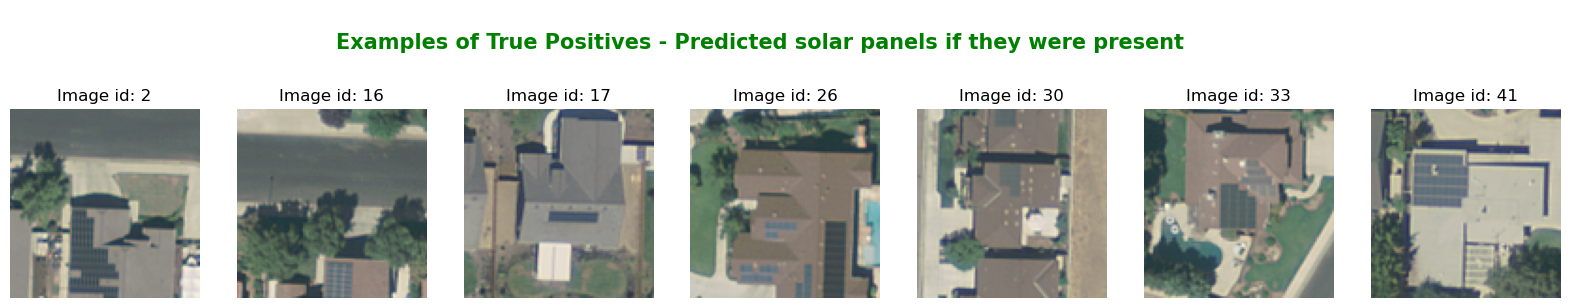

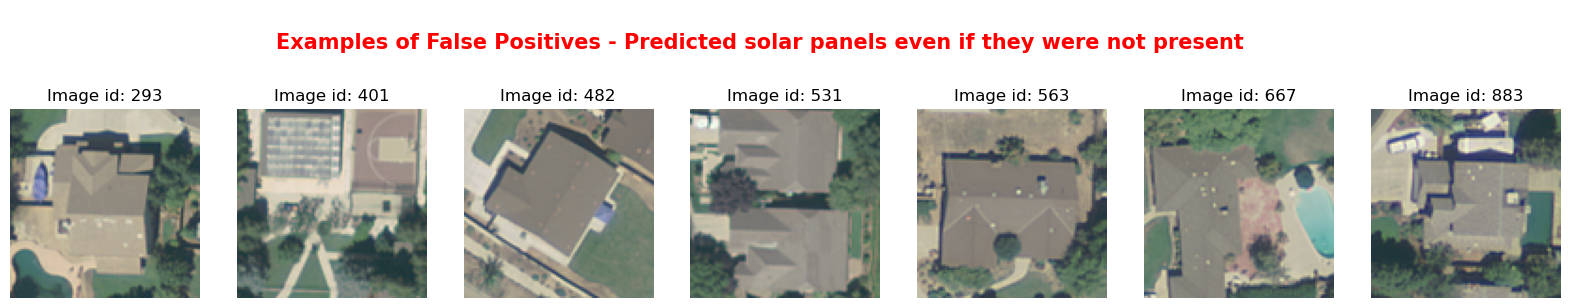

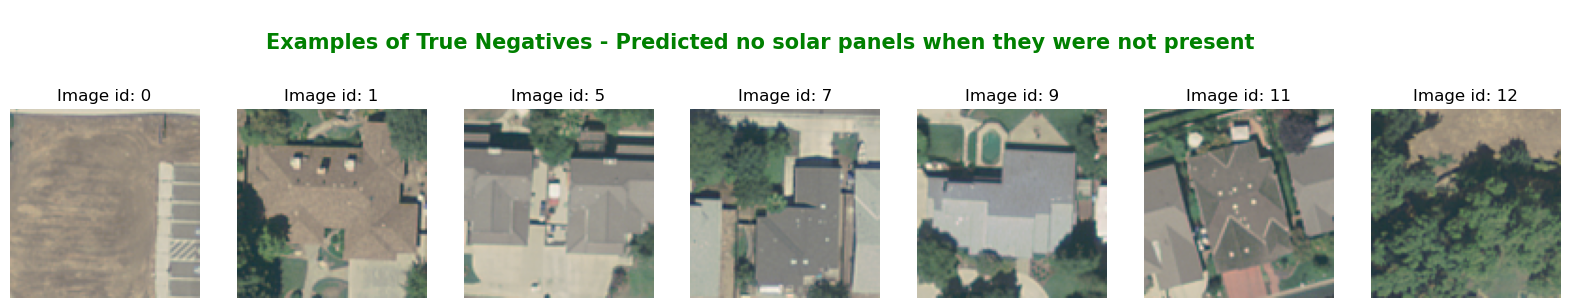

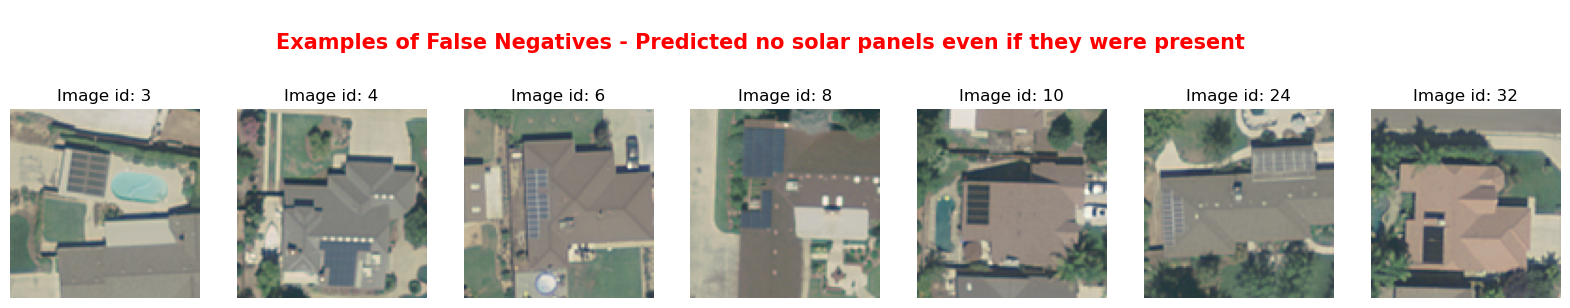

In [30]:
num_images = 7  # number of images to look at
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')


In [31]:
# ROC - AUC
def plot_roc(y_true, y_pred_cnn):
    '''
    Plots ROC curves for the CNN models.
    '''
    plt.figure(figsize=(8, 8))

    # ROC of CNN
    fpr, tpr, _ = roc_curve(y_true, y_pred_cnn, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    # ROC of chance
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    # plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

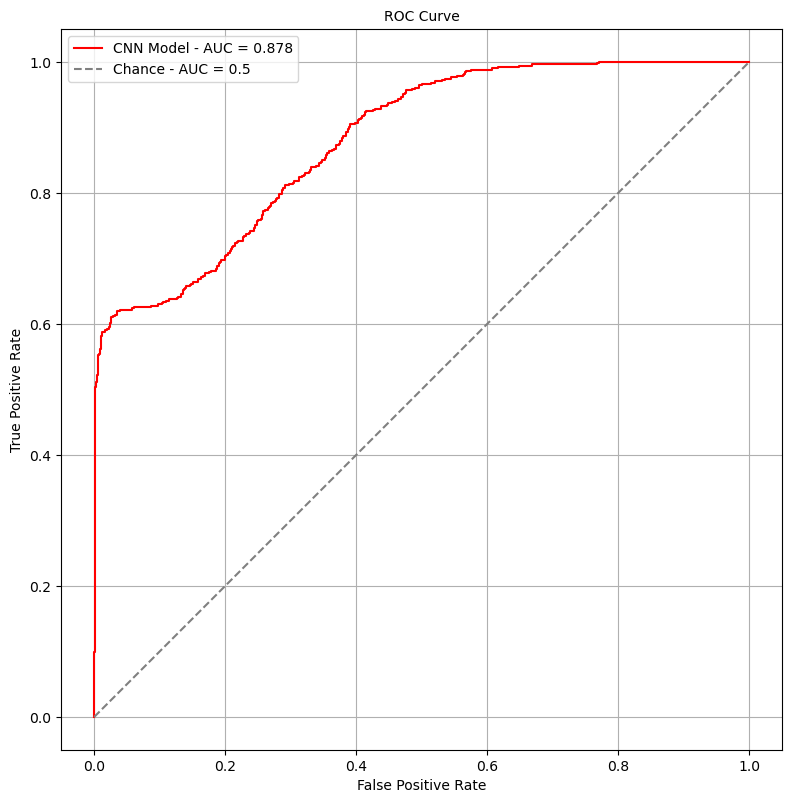

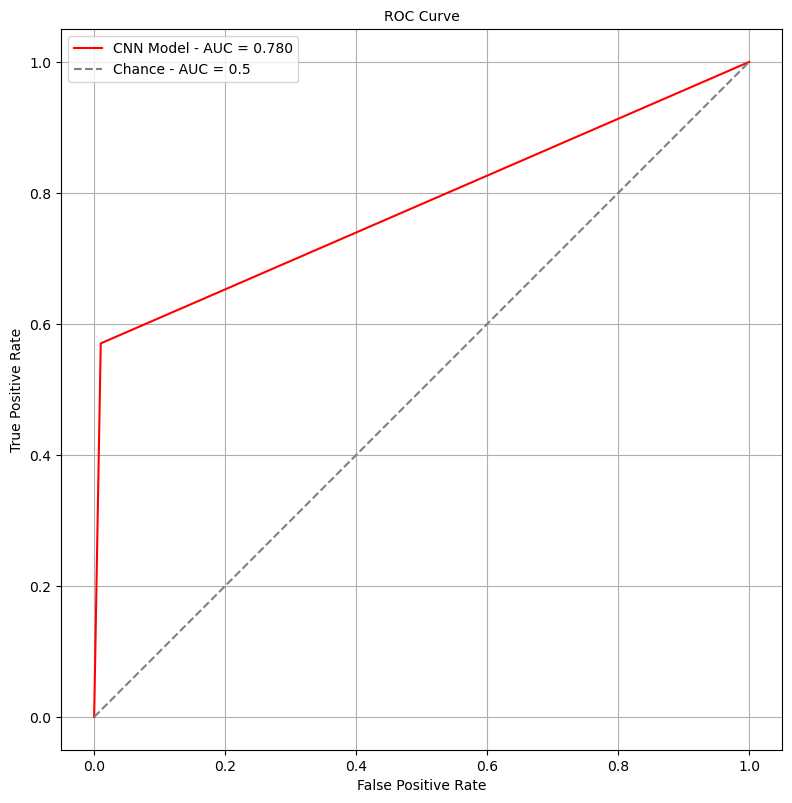

In [32]:
# plot ROC
y_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(y,  cnn_y_hat_prob)
plot_roc(y, y_pred)

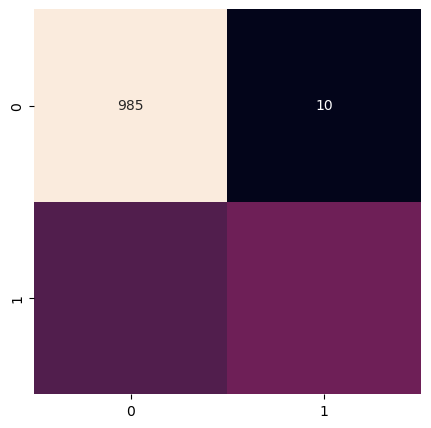

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y, y_pred), annot = True, cbar = False, fmt='.0f')
plt.show()

## VGG16 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

def build_vgg16_model():
    '''
    Returns a Keras VGG16 model
    '''

    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    # define a sequential model
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten layer to transition from convolutional layers to fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [44]:
# Create an instance of the VGG16 model
vgg16_model = build_vgg16_model()

# Print the summary of the model
vgg16_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 101, 101, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 101, 101, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                 

In [48]:
# number of subsets of data, where k subsets are used as test set and other k-1 subsets are used for the training purpose
num_folds = 3

# seed value is the previous value number generated by the random function
random_seed = 1

# build_rnn_model() function returns the predefined sequential model
cnn = build_vgg16_model()

# lets look at summary of the model
cnn.summary()

# generate the probabilities (y_pred_prob)
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 101, 101, 64)      1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 101, 101, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 50, 50, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 25, 25, 128)       0         
 ng2D)                                                

## Alex Net

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_alexnet_model(input_shape=(101,101,3), num_classes=1):
    model = Sequential()

    # Layer 1: Convolutional layer with 96 filters, a 11x11 kernel size, and a stride of 4x4
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    # Max pooling with a 3x3 window and stride of 2x2
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 2: Convolutional layer with 256 filters, a 5x5 kernel size, and padding to maintain input size
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    # Max pooling with a 3x3 window and stride of 2x2
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 3: Convolutional layer with 384 filters, a 3x3 kernel size, and padding to maintain input size
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 4: Convolutional layer with 384 filters, a 3x3 kernel size, and padding to maintain input size
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 5: Convolutional layer with 256 filters, a 3x3 kernel size, and padding to maintain input size
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    # Max pooling with a 3x3 window and stride of 2x2
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten the output for fully connected layers
    model.add(Flatten())

    # Layer 6: Fully connected layer with 4096 neurons and ReLU activation
    model.add(Dense(4096, activation='relu'))
    # Dropout layer with a dropout rate of 0.5 to prevent overfitting
    model.add(Dropout(0.25))

    # Layer 7: Fully connected layer with 4096 neurons and ReLU activation
    model.add(Dense(4096, activation='relu'))
    # Dropout layer with a dropout rate of 0.5 to prevent overfitting
    model.add(Dropout(0.25))

    model.add(Dense(1000, activation='relu'))
    # Output layer: Fully connected layer with num_classes neurons and softmax activation for classification
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    return model


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

def build_alexnet_model1(input_shape=(101,101,3), num_classes=1):
                model = Sequential()
                model.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                                padding= 'valid', activation= 'relu',
                                input_shape= input_shape,
                                kernel_initializer= 'he_normal'))
                model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                                    padding= 'valid', data_format= None))

                model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                                padding= 'same', activation= 'relu',
                                kernel_initializer= 'he_normal'))
                model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                                    padding= 'valid', data_format= None)) 
                
                model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                                padding= 'same', activation= 'relu',
                                kernel_initializer= 'he_normal'))

                model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                                padding= 'same', activation= 'relu',
                                kernel_initializer= 'he_normal'))

                model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                                padding= 'same', activation= 'relu',
                                kernel_initializer= 'he_normal'))

                model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                                    padding= 'valid', data_format= None))

                model.add(Flatten())
                model.add(Dense(4096, activation= 'relu'))
                model.add(Dense(4096, activation= 'relu'))
                model.add(Dense(1000, activation= 'relu'))
                model.add(Dense(num_classes, activation= 'softmax'))
                
                model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
                return model

In [40]:
# Create an instance of the VGG16 model
alexnet_model = build_alexnet_model1()
# Print the summary of the model
alexnet_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 23, 23, 96)        34944     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 11, 11, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 5, 5, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 5, 5, 384)         885120    
                                                                 
 conv2d_88 (Conv2D)          (None, 5, 5, 384)       

In [41]:
# number of subsets of data, where k subsets are used as test set and other k-1 subsets are used for the training purpose
num_folds = 4

# seed value is the previous value number generated by the random function
random_seed = 2

# build_rnn_model() function returns the predefined sequential model
cnn = build_alexnet_model1()

# lets look at summary of the model
cnn.summary()

# generate the probabilities (y_pred_prob)
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 23, 23, 96)        34944     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 11, 11, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 5, 5, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_92 (Conv2D)          (None, 5, 5, 384)         885120    
                                                                 
 conv2d_93 (Conv2D)          (None, 5, 5, 384)       

/Users/sharvarisoparkar/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


36/36 [==============================] - 18s 458ms/step - loss: 0.0000e+00 - accuracy: 0.3369
Epoch 2/10
36/36 [==============================] - 16s 434ms/step - loss: 0.0000e+00 - accuracy: 0.3369
Epoch 3/10
36/36 [==============================] - 15s 415ms/step - loss: 0.0000e+00 - accuracy: 0.3369
Epoch 4/10
36/36 [==============================] - 16s 450ms/step - loss: nan - accuracy: 0.3822
Epoch 5/10
36/36 [==============================] - 16s 444ms/step - loss: nan - accuracy: 0.6631
Epoch 6/10
36/36 [==============================] - 16s 441ms/step - loss: nan - accuracy: 0.6631
Epoch 7/10
36/36 [==============================] - 16s 435ms/step - loss: nan - accuracy: 0.6631
Epoch 8/10
36/36 [==============================] - 16s 451ms/step - loss: nan - accuracy: 0.6631
Epoch 9/10
36/36 [==============================] - 956s 27s/step - loss: nan - accuracy: 0.6631
Epoch 10/10
12/12 [==============================] - 1s 85ms/step
Epoch 1/10
36/36 [=========================